Implementación de regresión líneal manual con descenso de gradiente

In [52]:
#Importación de librerías
import numpy as np
import pandas as pd

In [2]:
#Carga de datos
data = pd.read_csv('./Student_Performance.csv')

In [3]:
print(data.to_string())  # Muestra todo el DataFrame

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  Sample Question Papers Practiced  Performance Index
0                 7               99                        Yes            9                                 1               91.0
1                 4               82                         No            4                                 2               65.0
2                 8               51                        Yes            7                                 2               45.0
3                 5               52                        Yes            5                                 2               36.0
4                 7               75                         No            8                                 5               66.0
5                 3               78                         No            9                                 6               61.0
6                 7               73                        Yes            5              

A continuación se va a evaluar la limpieza del dataset

In [ ]:
#Verificación de valores nulos
data["Hours Studied"].isna().all()
data["Previous Scores"].isna().all()
data["Extracurricular Activities"].isna().all()
data["Sleep Hours"].isna().all()
data["Sample Question Papers Practiced"].isna().all()
data["Performance Index"].isna().all()

np.False_

En la prueba anterior se probó que todas las columnas poseen datos, por lo que no hay que tratar las columnas en el sentido de eliminar alguna

In [14]:
#Verificación de datos duplicados
data.duplicated().any()

np.True_

In [15]:
#Conteo de datos duplicados
data.duplicated().sum()

np.int64(127)

In [16]:
#Mostrar filas duplicadas
data[data.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [41]:
#Eliminación de filas duplicadas
data_clean = data.drop_duplicates()

Como se descubrio 127 filas duplicadas, se eliminaron para evitar redundacia de datos. A continuación se mostrará el dataset con una limpieza básica y su posterio análisis antes de DEA.

In [42]:
# Muestra un resumen del DataFrame
data_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


Como la categoría de Extracurricular Activities indica que es de tipo objeto, se realizará un cambio de tipo a boleano númerico, donde 1 es Yes y 0 es No.

In [ ]:
# Cambia los valores de "Yes" y "No" a 1 y 0 respectivamente
data_clean.loc[:, "Extracurricular Activities"] = data_clean["Extracurricular Activities"].fillna("No").map({"Yes": 1, "No": 0})

In [44]:
# Muestra estadísticas descriptivas del DataFrame
print(data_clean.describe) 

<bound method NDFrame.describe of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                          1            9   
1                 4               82                          0            4   
2                 8               51                          1            7   
3                 5               52                          1            5   
4                 7               75                          0            8   
...             ...              ...                        ...          ...   
9995              1               49                          1            4   
9996              7               64                          1            8   
9997              6               83                          1            8   
9998              9               97                          1            7   
9999              7               74                          0            8   

     

In [45]:
# Verifica si hay valores nulos en el DataFrame
print(data_clean.isnull().sum()) 

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [46]:
# Muestra estadísticas descriptivas del DataFrame
print(data_clean.describe()) 

       Hours Studied  Previous Scores  Sleep Hours  \
count    9873.000000      9873.000000  9873.000000   
mean        4.992100        69.441102     6.531652   
std         2.589081        17.325601     1.697683   
min         1.000000        40.000000     4.000000   
25%         3.000000        54.000000     5.000000   
50%         5.000000        69.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max         9.000000        99.000000     9.000000   

       Sample Question Papers Practiced  Performance Index  
count                       9873.000000        9873.000000  
mean                           4.583004          55.216651  
std                            2.867202          19.208570  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          70.000000  
max                      

A continuación se realizará el DEA

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

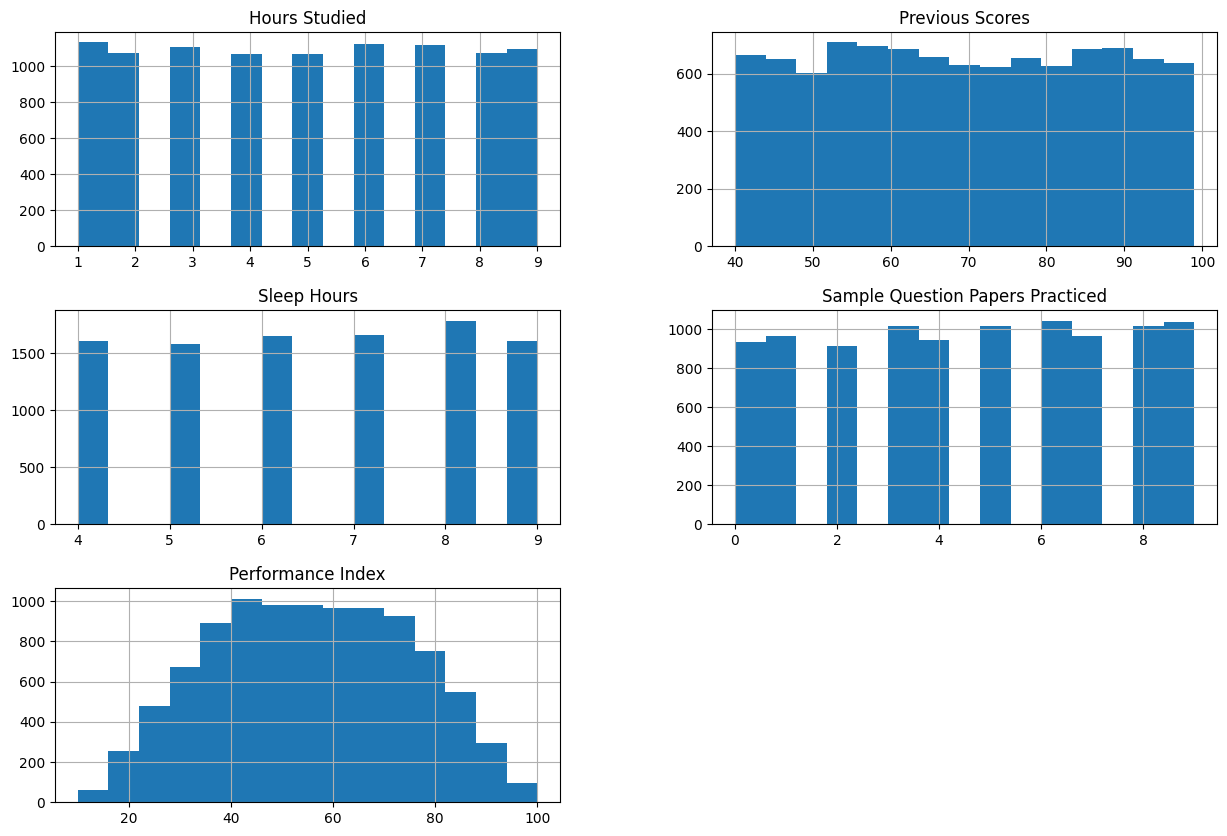

In [ ]:
#histogramas de las variables numéricas de 15x10
data_clean.hist(bins=15, figsize=(15, 10))

Hours Studied                          Axes(0.125,0.653529;0.227941x0.226471)
Previous Scores                     Axes(0.398529,0.653529;0.227941x0.226471)
Sleep Hours                         Axes(0.672059,0.653529;0.227941x0.226471)
Sample Question Papers Practiced       Axes(0.125,0.381765;0.227941x0.226471)
Performance Index                   Axes(0.398529,0.381765;0.227941x0.226471)
dtype: object

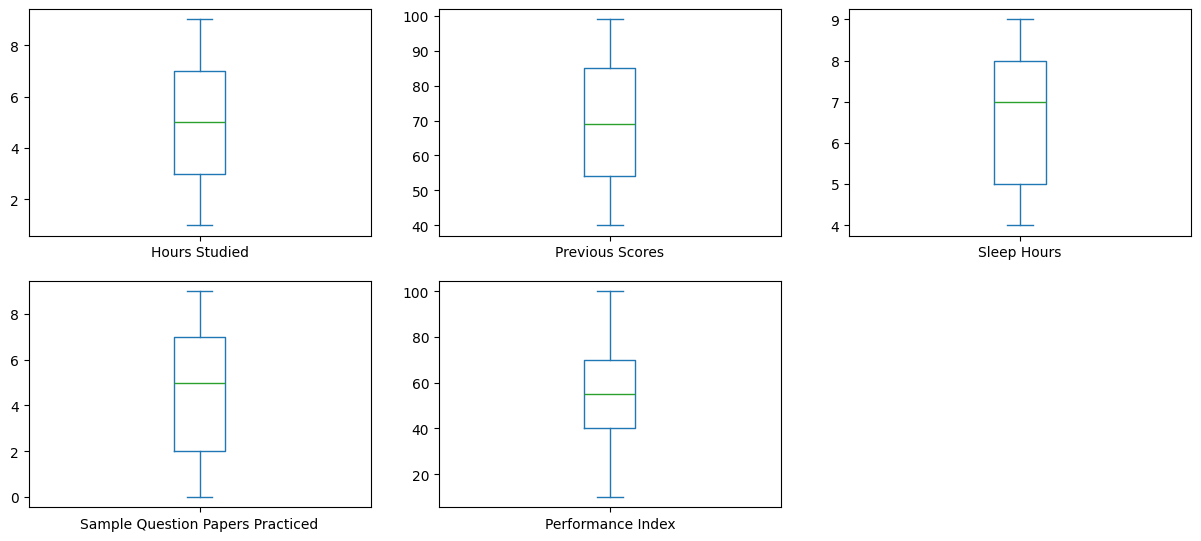

In [51]:
#Boxplot de las variables numéricas
data_clean.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10), sharex=False, sharey=False)

array([[<Axes: xlabel='Hours Studied', ylabel='Hours Studied'>,
        <Axes: xlabel='Previous Scores', ylabel='Hours Studied'>,
        <Axes: xlabel='Sleep Hours', ylabel='Hours Studied'>,
        <Axes: xlabel='Sample Question Papers Practiced', ylabel='Hours Studied'>,
        <Axes: xlabel='Performance Index', ylabel='Hours Studied'>],
       [<Axes: xlabel='Hours Studied', ylabel='Previous Scores'>,
        <Axes: xlabel='Previous Scores', ylabel='Previous Scores'>,
        <Axes: xlabel='Sleep Hours', ylabel='Previous Scores'>,
        <Axes: xlabel='Sample Question Papers Practiced', ylabel='Previous Scores'>,
        <Axes: xlabel='Performance Index', ylabel='Previous Scores'>],
       [<Axes: xlabel='Hours Studied', ylabel='Sleep Hours'>,
        <Axes: xlabel='Previous Scores', ylabel='Sleep Hours'>,
        <Axes: xlabel='Sleep Hours', ylabel='Sleep Hours'>,
        <Axes: xlabel='Sample Question Papers Practiced', ylabel='Sleep Hours'>,
        <Axes: xlabel='Performance 

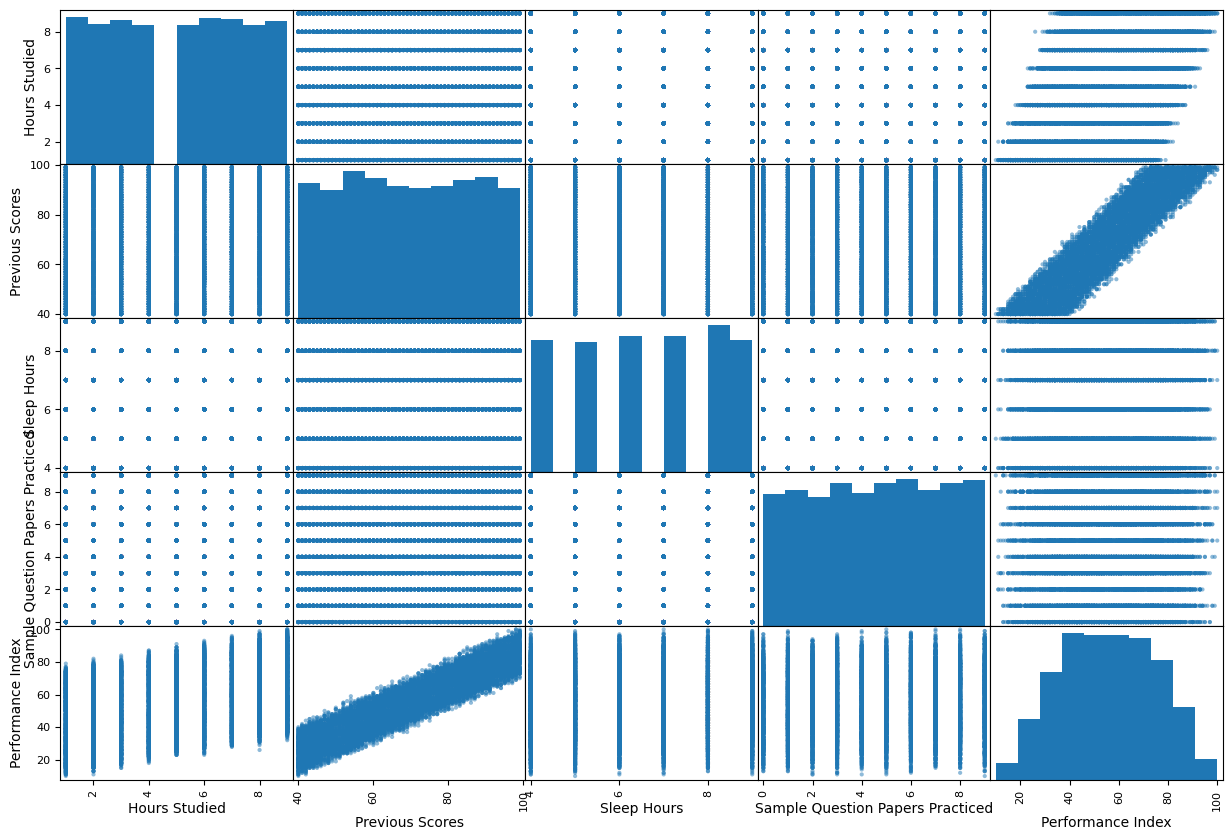

In [53]:
#diagramas de dispersión entre características
pd.plotting.scatter_matrix(data_clean, figsize=(15, 10))

In [ ]:
#matriz de correlación
print(data_clean.corr())

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.010676   
Previous Scores                       -0.010676         1.000000   
Extracurricular Activities             0.004899         0.009534   
Sleep Hours                            0.002131         0.007975   
Sample Question Papers Practiced       0.015740         0.008719   
Performance Index                      0.375332         0.915135   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.004899     0.002131   
Previous Scores                                     0.009534     0.007975   
Extracurricular Activities                          1.000000    -0.024008   
Sleep Hours                                        -0.024008     1.000000   
Sample Question Papers Practiced                    0.013839     0.004907   
Performance Index                                   0.026075 

Los valores de la matriz de correlación son, cercano a 1: correlación positiva fuerte, -1: correlación negativa fuerte y 0: poca o nula correlación

En la matriz anterior se observa una fuerte correlación entre las categorías de Performance Index, Hours Studied y Previous Scores. Las demás correlaciones son cercanas a 0